In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
train=pd.read_csv("D:\Data analytics\datasets\ML Algorithms datasets\logistic regression\\titanictrain.csv")
test=pd.read_csv("D:\Data analytics\datasets\ML Algorithms datasets\logistic regression\\titanictest.csv")

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
train.shape

(891, 12)

In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
test.shape

(418, 11)

In [70]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
train.shape[0]

891

In [73]:

(train.isna().sum()/train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

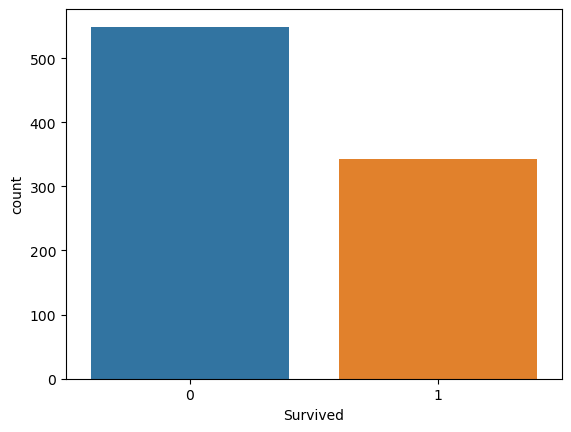

In [74]:
sns.countplot(x=train.Survived)

<Axes: xlabel='Survived', ylabel='count'>

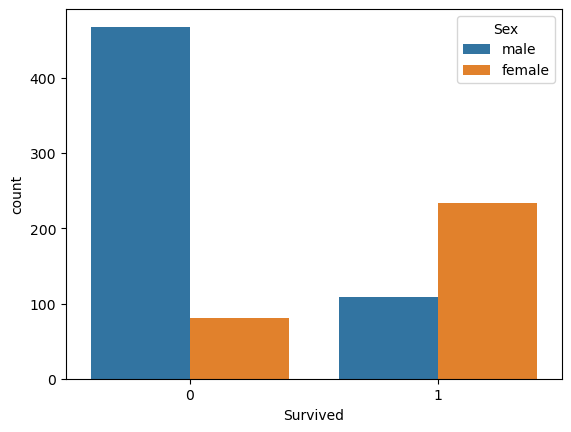

In [75]:
sns.countplot(x=train.Survived,hue=train.Sex)

C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_13132\75482443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train.Age)


<Axes: ylabel='Density'>

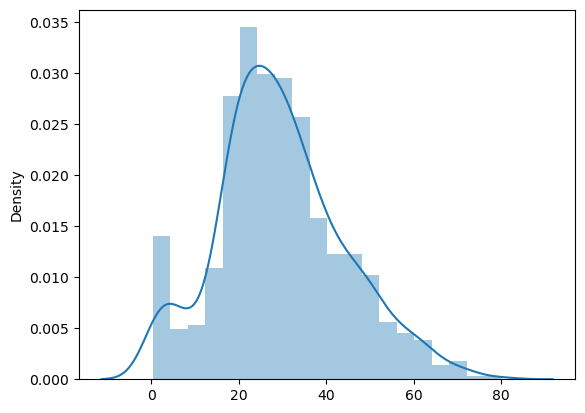

In [76]:
sns.distplot(x=train.Age)

<Axes: xlabel='SibSp', ylabel='count'>

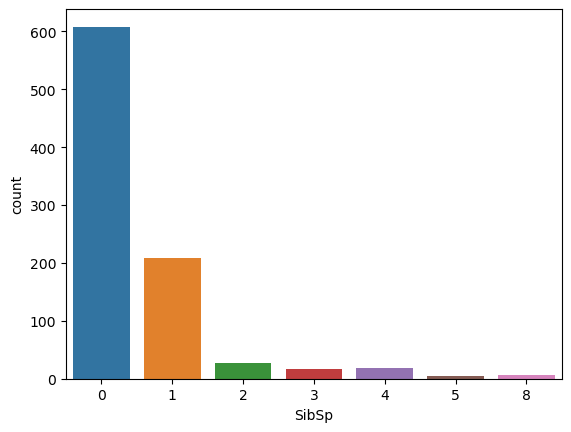

In [77]:
sns.countplot(x=train.SibSp)

C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_13132\3491778140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train.Fare)


<Axes: ylabel='Density'>

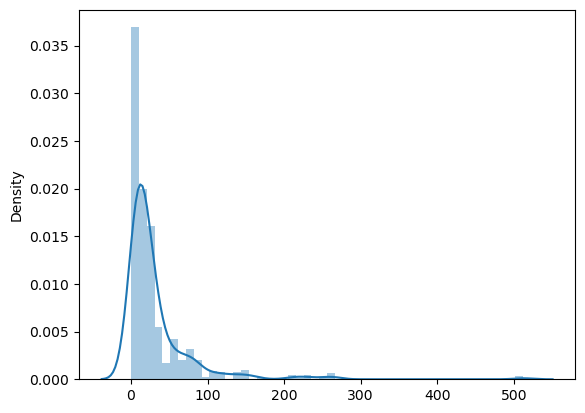

In [78]:
sns.distplot(x=train.Fare)

In [79]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
train.corr()

C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_13132\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [81]:
train.drop(['PassengerId','Name', 'Ticket',  'Cabin', ],axis=1,inplace=True)

In [82]:
test.drop(['Name', 'Ticket',  'Cabin', ],axis=1,inplace=True)

In [83]:
train.shape

(891, 8)

In [84]:
test.shape

(418, 8)

In [22]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

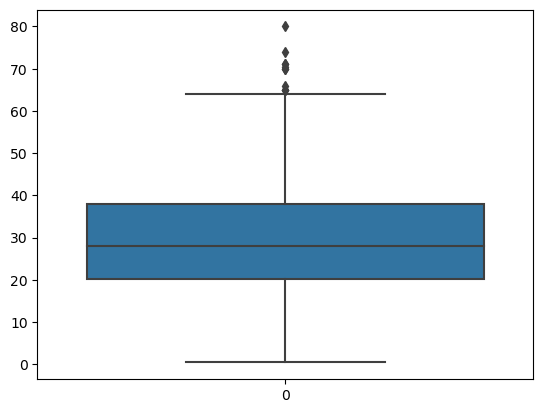

In [23]:
sns.boxplot(train.Age)

<Axes: >

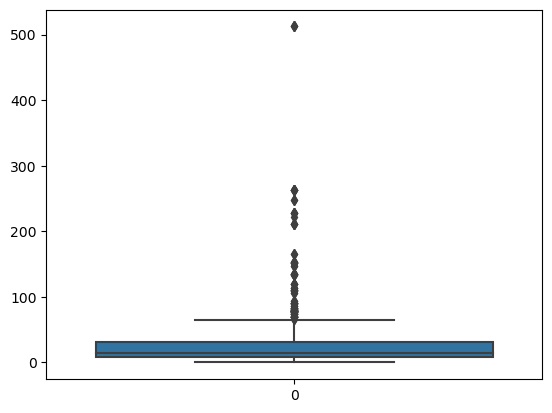

In [24]:
sns.boxplot(train.Fare)

In [25]:
round(np.mean(train.Age),0)

30.0

In [26]:
train.Age.fillna(28,inplace=True)

In [27]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [28]:
test.Age.fillna(27,inplace=True)

In [29]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [30]:
train.Embarked.fillna(("S"),inplace=True)

In [31]:
test.Embarked.fillna(("S"),inplace=True)

In [32]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [35]:
oh=LabelEncoder()

In [36]:
train["Sex"]=oh.fit_transform(train.Sex)

In [37]:
train['Embarked']=oh.fit_transform(train.Embarked)

In [38]:
test['Embarked']=oh.fit_transform(test.Embarked)
test["Sex"]=oh.fit_transform(test.Sex)

In [39]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [55]:
x=train.drop(["Survived"],axis=1)

In [56]:
y=train.Survived

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=51)

In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Sachin Pawar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred=lr.predict(x_test)

In [48]:
pred[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [49]:
y_test[0:5]

30     0
429    1
534    0
633    0
416    1
Name: Survived, dtype: int64

In [50]:
y_test.shape

(179,)

In [51]:
lr.score(x_train,y_train) #Training accuracy

0.8075842696629213

In [53]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(pred,y_test)) # testing accuracy

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       108
           1       0.77      0.62      0.69        71

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

[[95 13]
 [27 44]]
0.776536312849162
